In [181]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd

1. Generate 2D Data for given covariance matrix and mean. Now generate samples for two classes, and demonstrate the following cases
 1. Both PCA and LDA directions favors Classification
 2. LDA but PCA favors classification
 3. Will there be a case where PCA but LDA favors classification?

In [182]:
def GenerateData(mean_class_one, covariance_class_one, mean_class_two, covariance_class_two):

    minimum_eigen_value = np.min(np.real(np.linalg.eigvals(covariance_class_one)))
    if minimum_eigen_value < 0:
        covariance_class_one -= 10 * minimum_eigen_value * np.eye(len(covariance_class_one))
        
    minimum_eigen_value = np.min(np.real(np.linalg.eigvals(covariance_class_two)))
    if minimum_eigen_value < 0:
        covariance_class_two -= 10*minimum_eigen_value * np.eye(len(covariance_class_two))
        
    z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
    z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)
    z = np.concatenate((z_class_one, z_class_two), axis=0)
    
    labels = np.concatenate(
        (np.ones((z_class_one.shape[0])), 2 * np.ones((z_class_two.shape[0]))), 
        axis=0
    )
    
    return (z, labels, z_class_one, z_class_two)

In [183]:
#GenerateData(mean1,cov1,mean2,cov2)

In [184]:
def GetExtremes(Data):
    X = Data[:,0]
    Y = Data[:,1]
    return (min(X),max(X),min(Y),max(Y))

In [185]:
def PlotPoints(Data,Label):
    plt.scatter(Data[:,0], Data[:,1], c=Label)

In [186]:
def GetPCADirection(Data):
    scat_mat = (100-1)*np.cov(Data.T)
    eig_vals, eig_vecs = np.linalg.eig(scat_mat)
    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    max_eig_val_pos = np.where(eig_vals == max(eig_vals))[0][0]
    max_eig_vec = eig_vecs[:,max_eig_val_pos]
    return max_eig_vec

In [187]:
def getLine(DirVect,Data):
    e1,e2=DirVect 
    (min_x,max_x,min_y,max_y) = GetExtremes(Data)
    m = e2/e1
    xm = Data[:,0].mean()
    ym = Data[:,1].mean()
    c = ym-(xm*m)
    xdiff = abs(max_x - min_x)
    ydiff = abs(max_y - min_y)
    x_new = np.arange(min_x, max_x, 0.01)
    y_new = m*x_new + c
    Ydiff = abs(max(y_new)-min(y_new))
    print(xdiff,ydiff,Ydiff)
    if Ydiff > ydiff :
        print("Changed")
        y_new = np.arange(min_y,max_y, 0.01)
        x_new = (y_new - c)/m
      
    return (x_new,y_new)

In [188]:
def PlotData(Data,Label,Line):
    plt.scatter(Data[:,0], Data[:,1], c=Label)
    plt.plot(Line[0], Line[1], '-',color='r')

In [189]:
#Getting FLD
def GetFLDDirection(Data1,Data2):
    s1 = np.cov(Data1.T)
    s2 = np.cov(Data2.T)
    print(np.mean(Data1,axis=0))
    d_b_c = np.mean(Data1,axis=0)-np.mean(Data2,axis=0)
    d_b_c = d_b_c.T
    print (d_b_c.shape)
    e = np.matmul(inv(s1+s2),d_b_c)
    return e

******

Test 1

PCA

In [232]:
mean1 = [-1, 0]
cov1 = [[0.0584, -1.0331],[-1.0331, 2.7353]]
mean2 = [1, 0]
cov2 = [[0.0584, -1.0331],[-1.0331, 2.7353]]

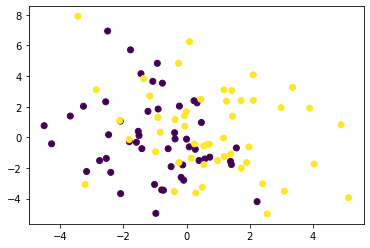

In [233]:
(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.96869695  0.24824628]
 [-0.24824628 -0.96869695]]

Eigenvalues 
[339.44936723 722.23162737]
9.62535215144606 12.90829697164168 37.538788306102795
Changed


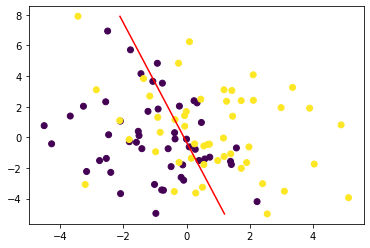

In [234]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[-1.01160937 -0.06597827]
(2,)
9.62535215144606 12.90829697164168 2.4311309191175168


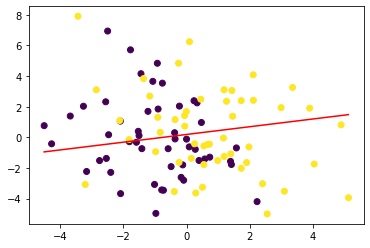

In [235]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

*******

Test 2

PCA

In [236]:
mean1 = [1, 4]
cov1 = [[0.3, -1],[-1.6, 2]]
mean2 = [3, 2]
cov2 = [[3, -1],[6, 8]]

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


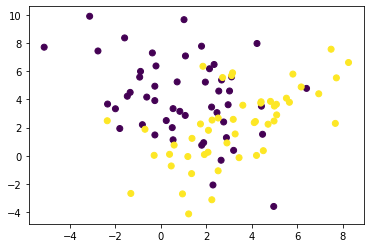

In [237]:
(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.98165328  0.19067467]
 [-0.19067467 -0.98165328]]

Eigenvalues 
[668.87644924 833.48061309]
13.386548691550441 14.024515351484272 68.88445728826579
Changed


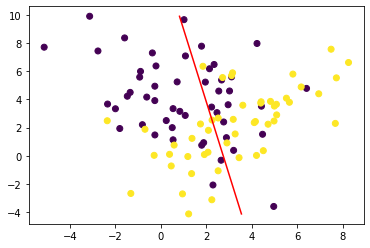

In [238]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[0.99012747 4.06648836]
(2,)
13.386548691550441 14.024515351484272 8.796415693775547


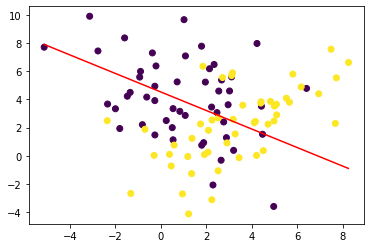

In [239]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

*********

Test 3
PCA

In [240]:
mean1 = [2, 6]
cov1 = [[3, 1],[4, 7]]
mean2 = [5, 2]
cov2 = [[2, 4],[1, 1]]

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


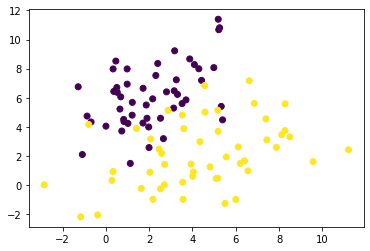

In [241]:
(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.99876739  0.04963574]
 [-0.04963574 -0.99876739]]

Eigenvalues 
[704.18831401 877.9149538 ]
14.05273056647251 13.562684236305536 282.71325297694403
Changed


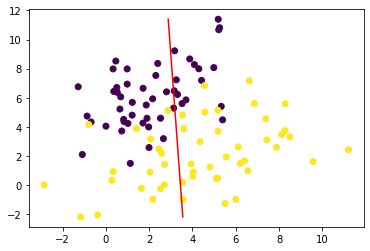

In [242]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[2.1177194 6.112351 ]
(2,)
14.05273056647251 13.562684236305536 20.293660055213767
Changed


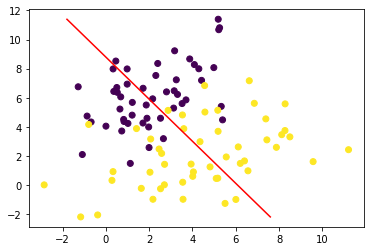

In [243]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

******

Test 4
PCA

In [244]:
mean1 = [3, 5]
cov1 = [[6, 4],[8, 2]]
mean2 = [2, 1]
cov2 = [[3, 4],[5, 3]]

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


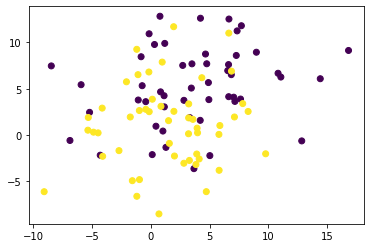

In [245]:
(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.72740459 -0.68620884]
 [ 0.68620884 -0.72740459]]

Eigenvalues 
[1691.13060847 2833.11140976]
25.885207980101434 21.3203367945286 27.4336757856767
Changed


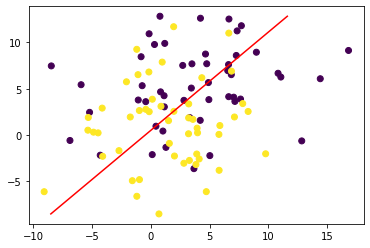

In [246]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[3.57699703 5.28734771]
(2,)
25.885207980101434 21.3203367945286 86.34347882480465
Changed


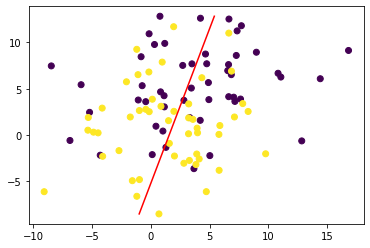

In [247]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

******

Test 5
PCA

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


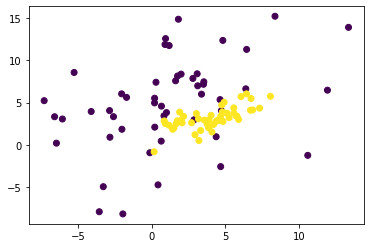

In [248]:
mean1 = [1, 6]
cov1 = [[1.3456, 4.432],[2.678, 2.589]]
mean2 = [4.22,3.421]
cov2 = [[3.78, 1.67],[5.13, 3.258]]

(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.7820757  -0.62318344]
 [ 0.62318344 -0.7820757 ]]

Eigenvalues 
[1062.425692   1872.03030932]
20.70194982901979 23.406812890977882 25.977852016323688
Changed


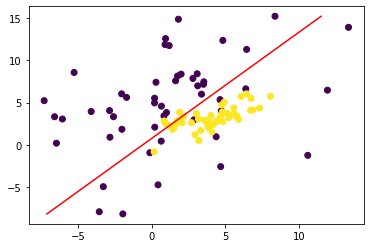

In [249]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[1.15654592 4.92198832]
(2,)
20.70194982901979 23.406812890977882 14.381083009898564


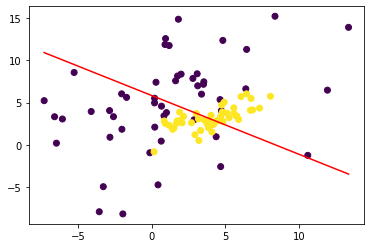

In [250]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

****

Test 6
PCA

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


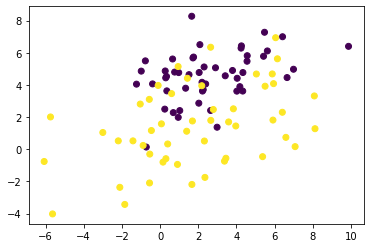

In [251]:
mean1 = [2.34, 4.567]
cov1 = [[5.3456, 1.32],[4.8, 3.89]]
mean2 = [3.21,2.2122]
cov2 = [[4.832, 3.23],[3.144, 1.568]]

(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[ 0.81499807 -0.57946367]
 [ 0.57946367  0.81499807]]

Eigenvalues 
[1105.57775403  439.28329942]
15.942510703397293 12.294354630789382 11.333340794599781


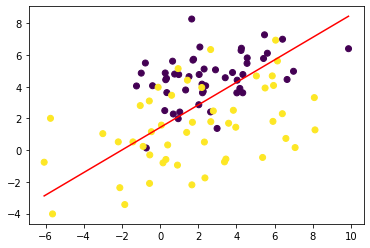

In [252]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[2.57152534 4.56092467]
(2,)
15.942510703397293 12.294354630789382 79.9868710390556
Changed


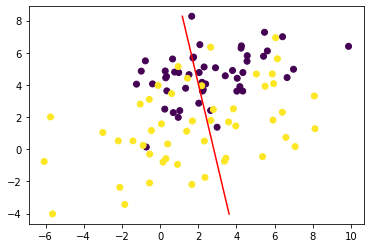

In [253]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

****

Test 7
PCA

<ipython-input-182-5e52eb498aa5>:11: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_one = np.random.multivariate_normal(mean_class_one, covariance_class_one, 50)
<ipython-input-182-5e52eb498aa5>:12: RuntimeWarning: covariance is not positive-semidefinite.
  z_class_two = np.random.multivariate_normal(mean_class_two, covariance_class_two, 50)


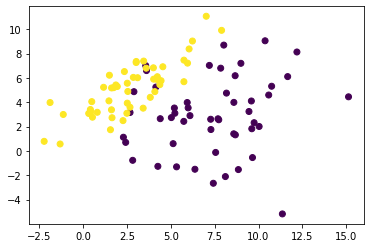

In [254]:
mean1 = [7.34, 3.567]
cov1 = [[8.3456, 4.32],[1.8, 9.89]]
mean2 = [2.67,5.22]
cov2 = [[7.2, 6.23],[6.144, 6.568]]

(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[ 0.99975454  0.02215529]
 [-0.02215529  0.99975454]]

Eigenvalues 
[1171.73012621  838.9589874 ]
17.356747021370964 16.233326962674486 0.3844886595316881


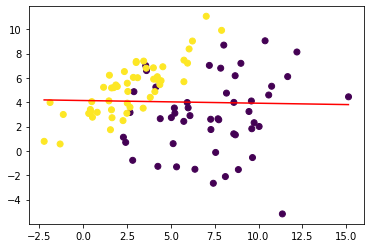

In [255]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[7.32007195 2.90337995]
(2,)
17.356747021370964 16.233326962674486 11.68556544900786


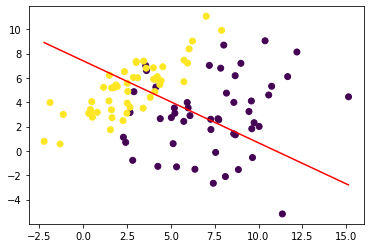

In [256]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

****

Test 8
PCA

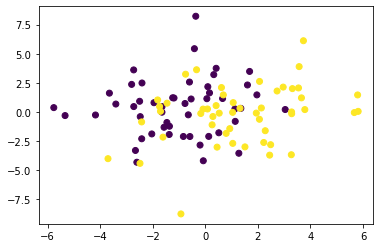

In [257]:
mean1 = [-1, 0]
cov1 = [[-0.0584, 1.0331], [1.0331, 2.7353]]

mean2 = [1, 0]
cov2 =[[-0.0584, 1.0331], [1.0331, 2.7353]]
(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.84452676 -0.53551335]
 [ 0.53551335 -0.84452676]]

Eigenvalues 
[488.06730382 646.14334225]
11.583723341834869 16.96623732603244 18.262140288979758
Changed


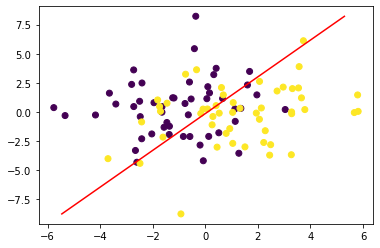

In [258]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[-1.01375209  0.35081179]
(2,)
11.583723341834869 16.96623732603244 3.7721947845407833


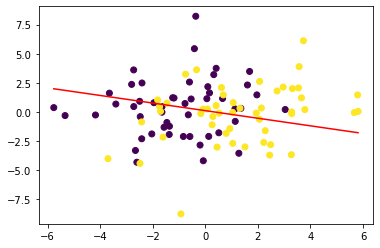

In [259]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

****

Test 9
PCA

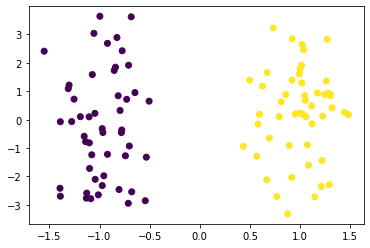

In [260]:
mean1 = [-1, 0]   
cov1 = [[0.0584, 0], [0, 2.7353]]

mean2 = [1, 0]
cov2 =[[0.0584, 0], [0, 2.7353]]

(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[-0.99321363 -0.11630431]
 [ 0.11630431 -0.99321363]]

Eigenvalues 
[ 99.65949597 304.03122705]
3.036899725628796 6.961714494630824 25.875544830693702
Changed


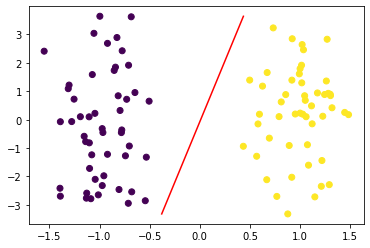

In [261]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[-0.96991651 -0.19810469]
(2,)
3.036899725628796 6.961714494630824 0.006125572603465475


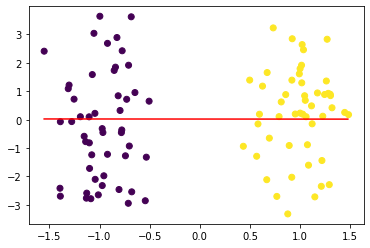

In [262]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

****

Test 10
PCA

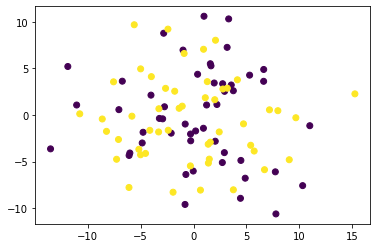

In [263]:
mean1 =[-1, 0] 
cov1 =[[0.0584, 0], [0, -2.7353]]

mean2 =[1, 0]
cov2 =[[0.0584, 0], [0, -2.7353]]

(Data,Label,Data1,Data2) = GenerateData(mean1,cov1,mean2,cov2)
PlotPoints(Data,Label)

Eigenvectors 
[[ 0.95633055  0.29228732]
 [-0.29228732  0.95633055]]

Eigenvalues 
[2842.76289295 2218.46709584]
28.825424567179972 21.200020652576214 8.808377695224086


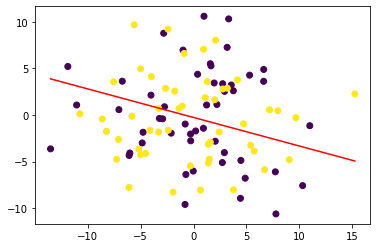

In [264]:
Vect = GetPCADirection(Data)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

FLD

[ 0.28001257 -0.11907675]
(2,)
28.825424567179972 21.200020652576214 19.6458854604232


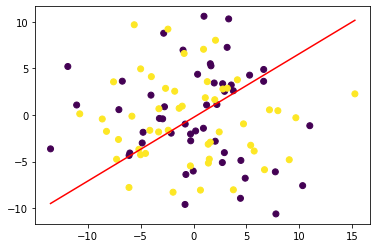

In [265]:
Vect = GetFLDDirection(Data1,Data2)
Line = getLine(Vect,Data)
PlotData(Data,Label,Line)

#### Summary

Case 1(Where they both favour Classification): Case 7 and Case 3 

Case 2(Where only LDA direction favour Classification): Case 6,Case 5, Case 9

Case 3(Where only PCA direction favour Classification): None